# Lection6

## Deep Learning Regression

<img src="../img/00-how-a-network-learns.png" width=600px>

[Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf)

[Daniel Bourke video 1](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=0s)

[Daniel Bourke video 2](https://www.youtube.com/watch?v=ZUKz4125WNI&t=0s)

[Daniel Bourke github repo](https://github.com/mrdbourke/tensorflow-deep-learning/)





# Plan

1. Import TensorFlow
2. Data preparation
3. Modeling
4. Evaluation & Improving
5. Model save & load

In [1]:
import tensorflow as tf 
tf.__version__

'2.3.0'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
X = tf.constant(np.arange(0,100,1).astype('float32'))
y= tf.constant(0.5*X+2)

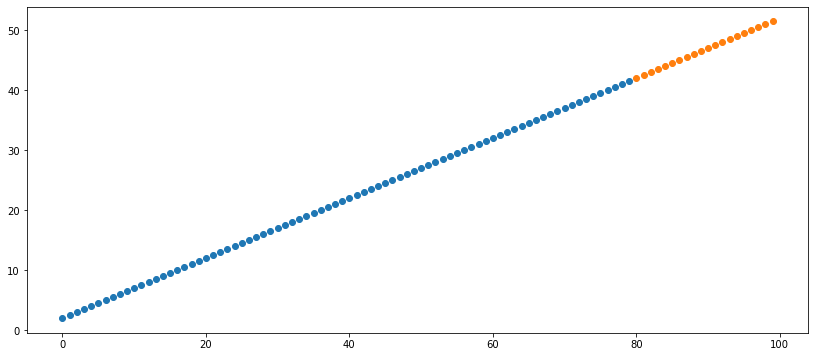

In [4]:
X_train=X[:80]
X_test=X[80:]
y_train=y[:80]
y_test=y[80:]

fig, sp = plt.subplots(figsize=(14,6))

sp.scatter(X_train,y_train)
sp.scatter(X_test,y_test)

 


In [5]:
from sklearn.linear_model import LinearRegression 

model1 = LinearRegression().fit(tf.reshape(X_train,(80,1)),y_train)

model1.score(tf.reshape(X_test,(20,1)),y_test)

y1_hat=model1.predict(tf.reshape(X_test,(20,1)))

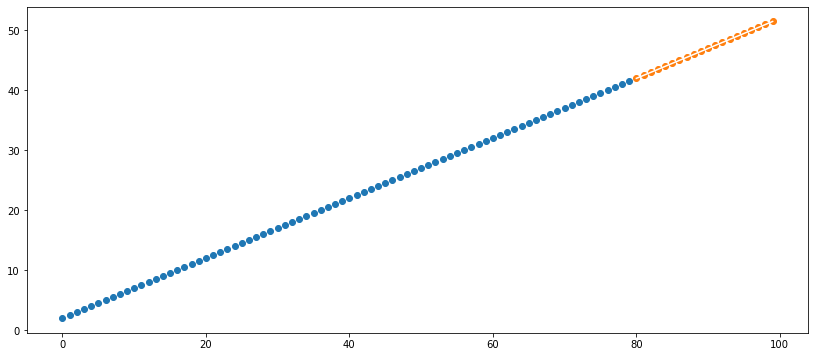

In [6]:
fig, sp = plt.subplots(figsize=(14,6))

sp.scatter(X_train,y_train)
sp.scatter(X_test,y_test)
sp.plot(X_test,y1_hat, c="white")

In [7]:
tf.random.set_seed(48)
# Create model 
model2 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile model 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

model2.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=['mae','mse']
)

In [8]:
# Fit model 
history2 = model2.fit(X_train,y_train, epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 989us/step - loss: 7.9941 - mae: 7.9941 - mse: 90.1914
Epoch 2/5
3/3 [==============================] - 0s 666us/step - loss: 7.0082 - mae: 7.0082 - mse: 76.7640
Epoch 3/5
3/3 [==============================] - 0s 999us/step - loss: 8.3075 - mae: 8.3075 - mse: 107.7038
Epoch 4/5
3/3 [==============================] - 0s 1000us/step - loss: 7.1188 - mae: 7.1188 - mse: 69.7185
Epoch 5/5
3/3 [==============================] - 0s 1ms/step - loss: 8.0735 - mae: 8.0735 - mse: 89.9874


In [9]:
# model2.summary()

history2.history

{'loss': [7.994070529937744,
  7.008151054382324,
  8.307527542114258,
  7.1188063621521,
  8.073513984680176],
 'mae': [7.994070529937744,
  7.008151054382324,
  8.307527542114258,
  7.1188063621521,
  8.073513984680176],
 'mse': [90.19136047363281,
  76.76398468017578,
  107.70381164550781,
  69.71846008300781,
  89.98738098144531]}

In [10]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 1000us/step - loss: 11.3364 - mae: 11.3364 - mse: 129.2497


[11.33643627166748, 11.33643627166748, 129.2496795654297]

In [11]:
y2_hat=model2.predict(X_test)

y2_hat

y_test-y2_hat



<tf.Tensor: shape=(20, 20), dtype=float32, numpy=
array([[ -9.924088  ,  -9.424088  ,  -8.924088  ,  -8.424088  ,
         -7.9240875 ,  -7.4240875 ,  -6.9240875 ,  -6.4240875 ,
         -5.9240875 ,  -5.4240875 ,  -4.9240875 ,  -4.4240875 ,
         -3.9240875 ,  -3.4240875 ,  -2.9240875 ,  -2.4240875 ,
         -1.9240875 ,  -1.4240875 ,  -0.9240875 ,  -0.42408752],
       [-10.572754  , -10.072754  ,  -9.572754  ,  -9.072754  ,
         -8.572754  ,  -8.072754  ,  -7.572754  ,  -7.072754  ,
         -6.572754  ,  -6.072754  ,  -5.572754  ,  -5.072754  ,
         -4.572754  ,  -4.072754  ,  -3.572754  ,  -3.072754  ,
         -2.572754  ,  -2.072754  ,  -1.5727539 ,  -1.0727539 ],
       [-11.221424  , -10.721424  , -10.221424  ,  -9.721424  ,
         -9.221424  ,  -8.721424  ,  -8.221424  ,  -7.721424  ,
         -7.221424  ,  -6.721424  ,  -6.221424  ,  -5.721424  ,
         -5.221424  ,  -4.721424  ,  -4.221424  ,  -3.721424  ,
         -3.221424  ,  -2.721424  ,  -2.221424  ,  -

In [12]:
tf.random.set_seed(48)
# Create model 
model3 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

model3.compile(
    loss=mae, 
    optimizer=SGD(), 
    metrics=['mae']
)

In [13]:
model3.fit(X_train,y_train,epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 666us/step - loss: 14.1553 - mae: 14.1553
Epoch 2/10
3/3 [==============================] - 0s 1000us/step - loss: 8.8096 - mae: 8.8096
Epoch 3/10
3/3 [==============================] - 0s 666us/step - loss: 9.6584 - mae: 9.6584
Epoch 4/10
3/3 [==============================] - 0s 667us/step - loss: 9.1761 - mae: 9.1761
Epoch 5/10
3/3 [==============================] - 0s 998us/step - loss: 6.5064 - mae: 6.5064
Epoch 6/10
3/3 [==============================] - 0s 667us/step - loss: 8.8829 - mae: 8.8829
Epoch 7/10
3/3 [==============================] - 0s 666us/step - loss: 6.4743 - mae: 6.4743
Epoch 8/10
3/3 [==============================] - 0s 956us/step - loss: 9.2889 - mae: 9.2889
Epoch 9/10
3/3 [==============================] - 0s 666us/step - loss: 10.3863 - mae: 10.3863
Epoch 10/10
3/3 [==============================] - 0s 868us/step - loss: 7.0824 - mae: 7.0824


In [14]:
y3_hat=model3.predict(X_test)

y_test-y3_hat

<tf.Tensor: shape=(20, 20), dtype=float32, numpy=
array([[ 7.8516045 ,  8.351604  ,  8.851604  ,  9.351604  ,  9.851604  ,
        10.351604  , 10.851604  , 11.351604  , 11.851604  , 12.351604  ,
        12.851604  , 13.351604  , 13.851604  , 14.351604  , 14.851604  ,
        15.351604  , 15.851604  , 16.351604  , 16.851604  , 17.351604  ],
       [ 7.426197  ,  7.926197  ,  8.426197  ,  8.926197  ,  9.426197  ,
         9.926197  , 10.426197  , 10.926197  , 11.426197  , 11.926197  ,
        12.426197  , 12.926197  , 13.426197  , 13.926197  , 14.426197  ,
        14.926197  , 15.426197  , 15.926197  , 16.426197  , 16.926197  ],
       [ 7.0007935 ,  7.5007935 ,  8.000793  ,  8.500793  ,  9.000793  ,
         9.500793  , 10.000793  , 10.500793  , 11.000793  , 11.500793  ,
        12.000793  , 12.500793  , 13.000793  , 13.500793  , 14.000793  ,
        14.500793  , 15.000793  , 15.500793  , 16.000793  , 16.500793  ],
       [ 6.575382  ,  7.075382  ,  7.575382  ,  8.075382  ,  8.575382  

In [15]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

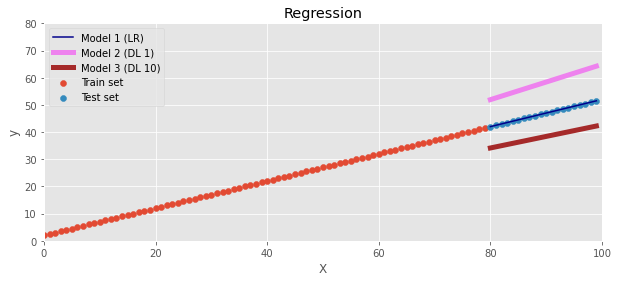

In [16]:
matplotlib.style.use('ggplot')

fig, sp = plt.subplots(figsize=(10,4))

sp.scatter(X_train,y_train, label='Train set')
sp.scatter(X_test,y_test, label='Test set')
sp.plot(X_test,y1_hat, c="darkblue", label='Model 1 (LR)')
sp.plot(X_test,y2_hat, c="violet", label='Model 2 (DL 1)', linewidth=5)
sp.plot(X_test,y3_hat, c="brown", label='Model 3 (DL 10)', linewidth=5)

sp.set_title('Regression')
sp.set_xlabel('X')
sp.set_ylabel('y')
sp.set_xlim(0,100)
sp.set_ylim(0,80)
sp.legend(loc=('upper left'))


In [17]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [18]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,0,0,1,0


In [21]:
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X.head(), y.head()


(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [23]:
tf.random.set_seed=48

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

In [24]:
X_train.shape

(1070, 11)

In [25]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 706us/step - loss: 318006080.0000 - mse: 318006080.0000
Epoch 2/10
34/34 [==============================] - 0s 948us/step - loss: 317679648.0000 - mse: 317679648.0000
Epoch 3/10
34/34 [==============================] - 0s 781us/step - loss: 317343904.0000 - mse: 317343904.0000
Epoch 4/10
34/34 [==============================] - 0s 613us/step - loss: 316974560.0000 - mse: 316974560.0000
Epoch 5/10
34/34 [==============================] - 0s 615us/ste

In [26]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

In [27]:

score1=ins_model.evaluate(X_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 134756864.0000 - mse: 134756864.0000


<AxesSubplot:title={'center':'History ins_model2'}, xlabel='epochs', ylabel='loss'>

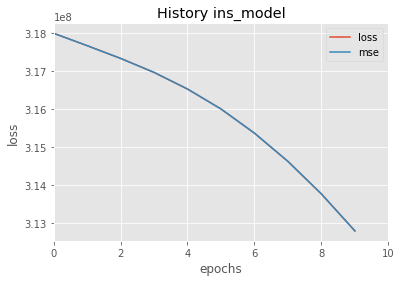

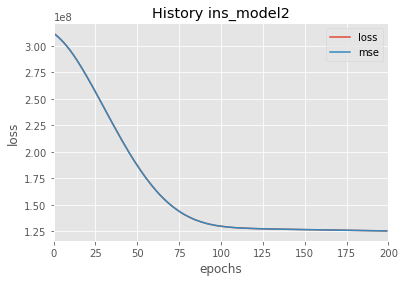

In [28]:


pd.DataFrame(ins_history.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,10))
pd.DataFrame(ins_history2.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model2", xlim=(0,200))




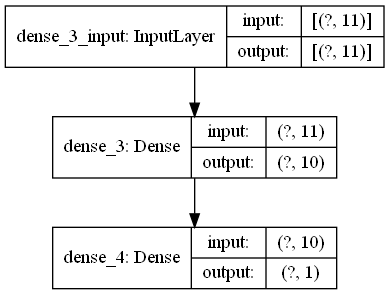

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(ins_model, show_shapes=True)

In [30]:
# Model save and load 
ins_model.save("ins_model.h5")

In [31]:
ins_model_loaded=tf.keras.models.load_model("ins_model.h5")

In [32]:
y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

0.0

In [33]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
655,52,25.30,2,1,0,0,1,0,0,1,0
516,20,35.31,1,0,1,1,0,0,0,1,0
226,28,38.06,0,0,1,1,0,0,0,1,0
149,19,28.40,1,0,1,1,0,0,0,0,1
11,62,26.29,0,1,0,0,1,0,0,1,0


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [35]:
insurance2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [36]:
insurance2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [37]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), 
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [38]:
X=insurance2.drop("charges", axis=1)
y = insurance2["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [39]:
ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [92]:
# tf.random.set_seed(48)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

im3.compile(
    loss=mae, 
    optimizer=Adam(), 
    metrics=["mae"]
)



In [93]:
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

9/9 [==============================] - 0s 779us/step - loss: 8361.2412 - mae: 8361.2412


(1070, 6)

In [64]:
# pd.DataFrame(history_im3.history).plot(xlabel="epochs", 
# ylabel="loss",title="History im3", xlim=(0,200))


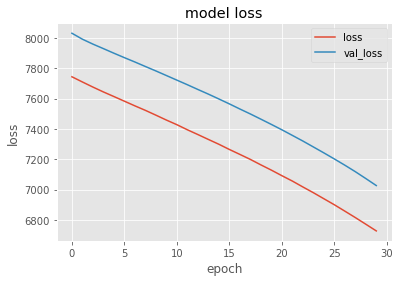

In [91]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()